# Project: Investigate a Data Set (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

####  This dataset is collected from The Movie Database(TMDB) and contains about 10,000 movies (10,866 to be exact) 
#### it contains information about movies like: title, director, date of release, budget, revenue, genres and rating votes




#### Questions to guide my analysis:

     1- Is higher budget related to higher revenue ?
     2- Is higher vote count implies higher revenue ?
     3- What about popularity from year to year ?

In [1]:
# importing packages to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties

In [2]:
# loading data
df= pd.read_csv("tmdb-movies.csv")
# looking at the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### looks like we have 21 features in our data set. but, we won't them all as it appears.
### let's look closer in the data


In [3]:
# looking for columns data types and features with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### So, we have 9  features that have null values

### We will work with this features:

    1- popularity    (Float)
    2- budget        (Integer) 
    3- revenue       (Integer)
    4- vote count    (Integer)
    5- vote average  (Float)
    6- release year  (Integer)


In [4]:
# looking for number of null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Fortunately, our selected features don't have any null values

In [5]:
# looking if there is any duplicated rows
sum(df.duplicated())

1

### we have one duplicated row!

In [6]:
# Looking at the data for consistency 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Almost half the 'budget' and 'revenue' features has value of Zero


### Data Cleaning (Removing any duplicate rows)

In [7]:
# removing the duplicated rows
df.drop_duplicates(inplace=True)

#### Now let's extract only our needed features to work on them 

In [8]:
df.drop(['id','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','runtime','production_companies','genres','release_date','budget_adj','revenue_adj'], axis=1, inplace=True)

### let's see the shape of both budget and revenue

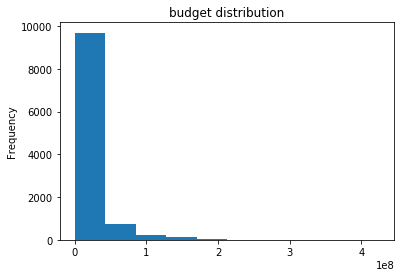

In [9]:
df['budget'].plot(kind='hist',title='budget distribution')

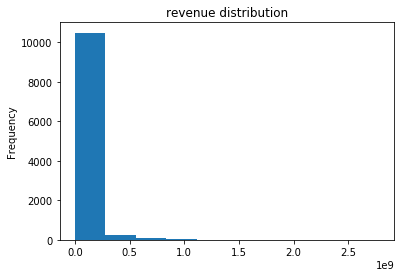

In [10]:
df['revenue'].plot(kind='hist',title='revenue distribution',label='revenue')

### they are both skewed to the right means the mean is larger than the median
### So, I will replace all Zero budget and revenue with the mean since that will not change much in the shape
### but it will affect real budget and revenue that are under the mean or higher than the mean
### but also that will not be a problem since the 75 quartile is not far from the mean too

In [11]:
# replacing all zero values in budget and revenue with the mean value
df['budget'].replace(0.000000e+00, df['budget'].mean(), inplace=True)
df['revenue'].replace(0.000000e+00, df['revenue'].mean(), inplace=True)
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000
mean,0.646446,2.229110e+07,6.187923e+07,217.399632,5.975012,2001.321859
std,1.000231,2.801385e+07,1.110236e+08,575.644627,0.935138,12.813260
min,0.000065,1.000000e+00,2.000000e+00,10.000000,1.500000,1960.000000
25%,0.207575,1.462429e+07,3.982690e+07,17.000000,5.400000,1995.000000
50%,0.383831,1.462429e+07,3.982690e+07,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,3.982690e+07,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is higher budget related to higher revenue)

Text(0,0.5,'revenue')

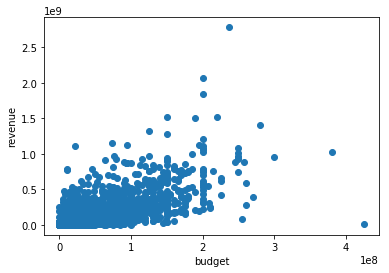

In [12]:
plt.scatter(df['budget'],df['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')

### As we can see above, high budget is positively related with high revenue between 0 to 200 million dollars 

### its maximum value at about 240 million or so

### but higher budgets than 240 millions have bad effect on revenue

### Research Question 2  (Is higher vote count implies higher revenue)

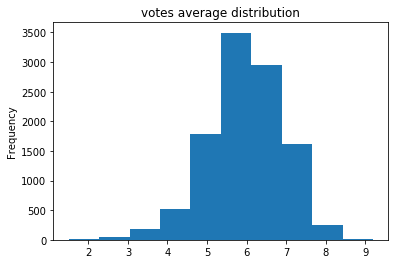

In [13]:
df['vote_average'].plot(kind='hist',title='votes average distribution')

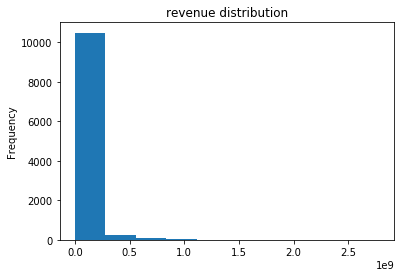

In [14]:
df['revenue'].plot(kind='hist',title='revenue distribution')

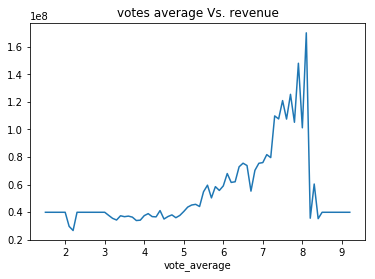

In [15]:
df.groupby(['vote_average'])['revenue'].mean().plot(kind='line',title='votes average Vs. revenue')

### Looks good up there since they are positively corelated 

### Research Question 3 (What about popularity from year to year)

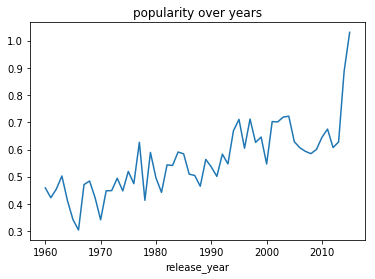

In [16]:
# grouping the mean popularity data per year and plotting the result 
df.groupby(['release_year'])['popularity'].mean().plot(kind='line',title='popularity over years')

### Above we can see that mean popularity from 1960 till 2015 has an up and down manner

### and as a general view it's rising over years as a whole 

### and have its highest value in 2015

<a id='conclusions'></a>
## Conclusions

### My Conclusions are:

    1- budget and revenue columns have half of them as zero value!
       That made me replace them with the mean value of both columns.
       sure that affected my view of the data because many movie budget that are under the mean
       now will be equal to the mean and so for the revenue  
 
 
    2- popularity of movies is rising over years with most popular year as 2015     

    3- Higher average votes likely means higher revenue of the movie until the limit of 8 points.
       after that limit the votes seem to be exaggerating or over estimating the movie goodness 
       As we can see below in the plot

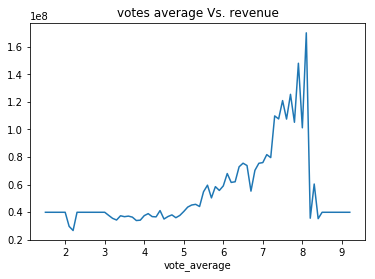

In [17]:
df.groupby(['vote_average'])['revenue'].mean().plot(kind='line',title='votes average Vs. revenue')